# Air Quality Analysis NYC — NO₂ Trends and Hotspots

This project analyzes nitrogen dioxide (NO₂) levels across different zones of New York City from 2008 to 2022, using real data and SQL queries.

## 📈 Key Insights

- A clear downward trend in NO₂ levels, from ~26 ppb in 2008 to ~16 ppb in 2022.
- Regression line confirms a ~38% average reduction.
- Geolocation of zones with highest NO₂ shows spatial concentration in areas with high traffic.

## 📦 Technologies Used

- Python (pandas, matplotlib, geopandas, scikit-learn)
- SQLite for query management
- Geopy + Contextily for mapping

## 🗺️ Visual Outputs

- NO₂ trend line from 2008–2022
- Interactive-like map of NYC zones with highest NO₂ concentration

## 📂 Files

- `air_quality_analysis.ipynb` – Full code
- `promedios_no2_anuales.csv` – Cleaned summary data
- `grafico_no2_tendencia.png` – NO₂ trend chart
- `mapa_zonas_NO2_nyc.png` – Map with NO₂ hotspots

---

If you're interested in urban air quality, check this out!


In [2]:
import pandas as pd
import sqlite3

# Cargar el CSV
df = pd.read_csv('Air_Quality.csv')

# Mostrar las primeras filas para explorarlo
df.head()


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,336867,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Winter 2014-15,12/01/2014,23.97,NaN
1,336741,375,Nitrogen dioxide (NO2),Mean,ppb,CD,107,Upper West Side (CD7),Winter 2014-15,12/01/2014,27.42,NaN
2,550157,375,Nitrogen dioxide (NO2),Mean,ppb,CD,414,Rockaway and Broad Channel (CD14),Annual Average 2017,01/01/2017,12.55,NaN
3,412802,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Winter 2015-16,12/01/2015,22.63,NaN
4,412803,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Summer 2016,06/01/2016,14.00,NaN


Tabla cargada: air_data
Columnas clave:

Name: tipo de contaminante (ej. Nitrogen dioxide)

Measure: tipo de medida (ej. Mean)

Data Value: valor de la medición

Geo Place Name: nombre del lugar

Time Period: estacionalidad o año

Start_Date: fecha de inicio

In [3]:
# Crear conexión a base SQLite
conn = sqlite3.connect('air_quality.db')

# Insertar el DataFrame en una tabla llamada 'air_data'
df.to_sql('air_data', conn, if_exists='replace', index=False)

# Verificar que la tabla se creó correctamente
pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)


,name
0,air_data


In [4]:
# Mostrar las primeras 5 filas
pd.read_sql("SELECT * FROM air_data LIMIT 5;", conn)


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,336867,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Winter 2014-15,12/01/2014,23.97,None
1,336741,375,Nitrogen dioxide (NO2),Mean,ppb,CD,107,Upper West Side (CD7),Winter 2014-15,12/01/2014,27.42,None
2,550157,375,Nitrogen dioxide (NO2),Mean,ppb,CD,414,Rockaway and Broad Channel (CD14),Annual Average 2017,01/01/2017,12.55,None
3,412802,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Winter 2015-16,12/01/2015,22.63,None
4,412803,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Summer 2016,06/01/2016,14.00,None


In [5]:
# Contar el número de registros
pd.read_sql("SELECT COUNT(*) AS total_registros FROM air_data;", conn)


,total_registros
0,18862


In [6]:
# Ver qué columnas hay (si no lo viste antes)
df.columns


Index(['Unique ID', 'Indicator ID', 'Name', 'Measure', 'Measure Info',
       'Geo Type Name', 'Geo Join ID', 'Geo Place Name', 'Time Period',
       'Start_Date', 'Data Value', 'Message'],
      dtype='object')

In [7]:
pd.read_sql("""
SELECT DISTINCT Name
FROM air_data;
""", conn)


,Name
0,Nitrogen dioxide (NO2)
1,Fine particles (PM 2.5)
2,Boiler Emissions- Total SO2 Emissions
3,Ozone (O3)
4,Asthma emergency department visits due to PM2.5
5,Annual vehicle miles traveled
6,Respiratory hospitalizations due to PM2.5 (age...
7,Asthma hospitalizations due to Ozone
8,Boiler Emissions- Total NOx Emissions
9,Boiler Emissions- Total PM2.5 Emissions


In [8]:
pd.read_sql("""
SELECT [Geo Place Name], ROUND(AVG([Data Value]), 2) AS avg_no2
FROM air_data
WHERE Name = 'Nitrogen dioxide (NO2)'
GROUP BY [Geo Place Name]
ORDER BY avg_no2 DESC
LIMIT 10;
""", conn)


,Geo Place Name,avg_no2
0,Midtown (CD5),33.95
1,Gramercy Park - Murray Hill,31.66
2,Chelsea - Clinton,29.98
3,Stuyvesant Town and Turtle Bay (CD6),29.48
4,Chelsea-Village,28.93
5,Upper East Side-Gramercy,28.54
6,Clinton and Chelsea (CD4),27.87
7,Financial District (CD1),27.62
8,Lower Manhattan,27.53
9,Greenwich Village - SoHo,26.84


In [9]:
pd.read_sql("""
SELECT [Time Period], [Data Value]
FROM air_data
WHERE Name = 'Nitrogen dioxide (NO2)' AND [Geo Place Name] = 'Flushing and Whitestone (CD7)'
ORDER BY [Start_Date];
""", conn)


,Time Period,Data Value
0,Annual Average 2015,19.040000
1,Annual Average 2017,18.450000
2,Annual Average 2018,17.620000
3,Annual Average 2019,16.270000
4,Annual Average 2020,15.610000
5,Annual Average 2021,15.664049
6,Annual Average 2022,15.198255
7,Annual Average 2023,15.407007
8,Summer 2009,19.230000
9,Summer 2010,17.790000


In [10]:
pd.read_sql("""
SELECT Name, COUNT(*) AS mediciones
FROM air_data
GROUP BY Name
ORDER BY mediciones DESC;
""", conn)


,Name,mediciones
0,Nitrogen dioxide (NO2),6345
1,Fine particles (PM 2.5),6345
2,Ozone (O3),2115
3,Asthma hospitalizations due to Ozone,480
4,Asthma emergency departments visits due to Ozone,480
5,Asthma emergency department visits due to PM2.5,480
6,Annual vehicle miles traveled (trucks),321
7,Annual vehicle miles traveled (cars),321
8,Annual vehicle miles traveled,321
9,Respiratory hospitalizations due to PM2.5 (age...,240


In [11]:
pd.read_sql("SELECT * FROM air_data LIMIT 5;", conn)


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,336867,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Winter 2014-15,12/01/2014,23.97,None
1,336741,375,Nitrogen dioxide (NO2),Mean,ppb,CD,107,Upper West Side (CD7),Winter 2014-15,12/01/2014,27.42,None
2,550157,375,Nitrogen dioxide (NO2),Mean,ppb,CD,414,Rockaway and Broad Channel (CD14),Annual Average 2017,01/01/2017,12.55,None
3,412802,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Winter 2015-16,12/01/2015,22.63,None
4,412803,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Summer 2016,06/01/2016,14.00,None


In [12]:
pd.read_sql("SELECT DISTINCT Name FROM air_data;", conn)


,Name
0,Nitrogen dioxide (NO2)
1,Fine particles (PM 2.5)
2,Boiler Emissions- Total SO2 Emissions
3,Ozone (O3)
4,Asthma emergency department visits due to PM2.5
5,Annual vehicle miles traveled
6,Respiratory hospitalizations due to PM2.5 (age...
7,Asthma hospitalizations due to Ozone
8,Boiler Emissions- Total NOx Emissions
9,Boiler Emissions- Total PM2.5 Emissions


In [13]:
pd.read_sql("""
SELECT [Geo Place Name], ROUND(AVG([Data Value]), 2) AS avg_no2
FROM air_data
WHERE Name = 'Nitrogen dioxide (NO2)'
GROUP BY [Geo Place Name]
ORDER BY avg_no2 DESC
LIMIT 10;
""", conn)


,Geo Place Name,avg_no2
0,Midtown (CD5),33.95
1,Gramercy Park - Murray Hill,31.66
2,Chelsea - Clinton,29.98
3,Stuyvesant Town and Turtle Bay (CD6),29.48
4,Chelsea-Village,28.93
5,Upper East Side-Gramercy,28.54
6,Clinton and Chelsea (CD4),27.87
7,Financial District (CD1),27.62
8,Lower Manhattan,27.53
9,Greenwich Village - SoHo,26.84


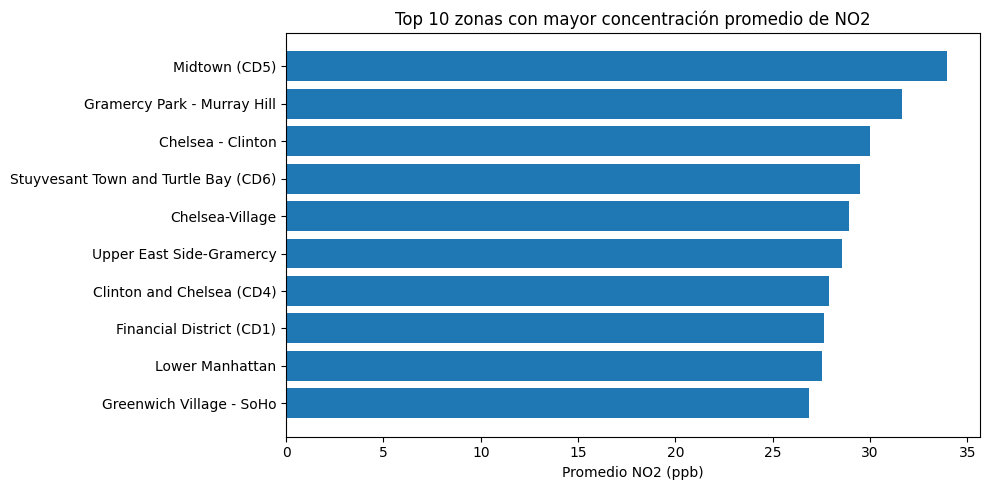

In [14]:
import matplotlib.pyplot as plt

# Obtener los datos de SQL
df_avg = pd.read_sql("""
SELECT [Geo Place Name] AS zone, ROUND(AVG([Data Value]), 2) AS avg_no2
FROM air_data
WHERE Name = 'Nitrogen dioxide (NO2)'
GROUP BY [Geo Place Name]
ORDER BY avg_no2 DESC
LIMIT 10;
""", conn)

# Graficar
plt.figure(figsize=(10,5))
plt.barh(df_avg['zone'], df_avg['avg_no2'])
plt.xlabel('Promedio NO2 (ppb)')
plt.title('Top 10 zonas con mayor concentración promedio de NO2')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [15]:
query = """
SELECT 
    [Geo Place Name] AS zona,
    [Time Period] AS periodo,
    [Data Value] AS valor_no2
FROM air_data
WHERE Name = 'Nitrogen dioxide (NO2)' 
AND ([Time Period] LIKE 'Summer%' OR [Time Period] LIKE 'Winter%')
"""
df_estaciones = pd.read_sql(query, conn)
df_estaciones.head()


,zona,periodo,valor_no2
0,Flushing and Whitestone (CD7),Winter 2014-15,23.97
1,Upper West Side (CD7),Winter 2014-15,27.42
2,Flushing and Whitestone (CD7),Winter 2015-16,22.63
3,Flushing and Whitestone (CD7),Summer 2016,14.00
4,Upper West Side (CD7),Winter 2015-16,26.43


In [16]:
df_estaciones['estacion'] = df_estaciones['periodo'].apply(lambda x: 'Summer' if 'Summer' in x else 'Winter')

promedios = df_estaciones.groupby(['zona', 'estacion'])['valor_no2'].mean().reset_index()
promedios = promedios.pivot(index='zona', columns='estacion', values='valor_no2').dropna()
promedios.head()


estacion,Summer,Winter
zona,,
Bay Ridge and Dyker Heights (CD10),14.444159,24.469588
Bayside - Little Neck,12.710446,21.467925
Bayside Little Neck-Fresh Meadows,13.228087,22.312900
Bayside and Little Neck (CD11),12.987419,21.815228
Bedford Stuyvesant (CD3),16.677401,26.967078


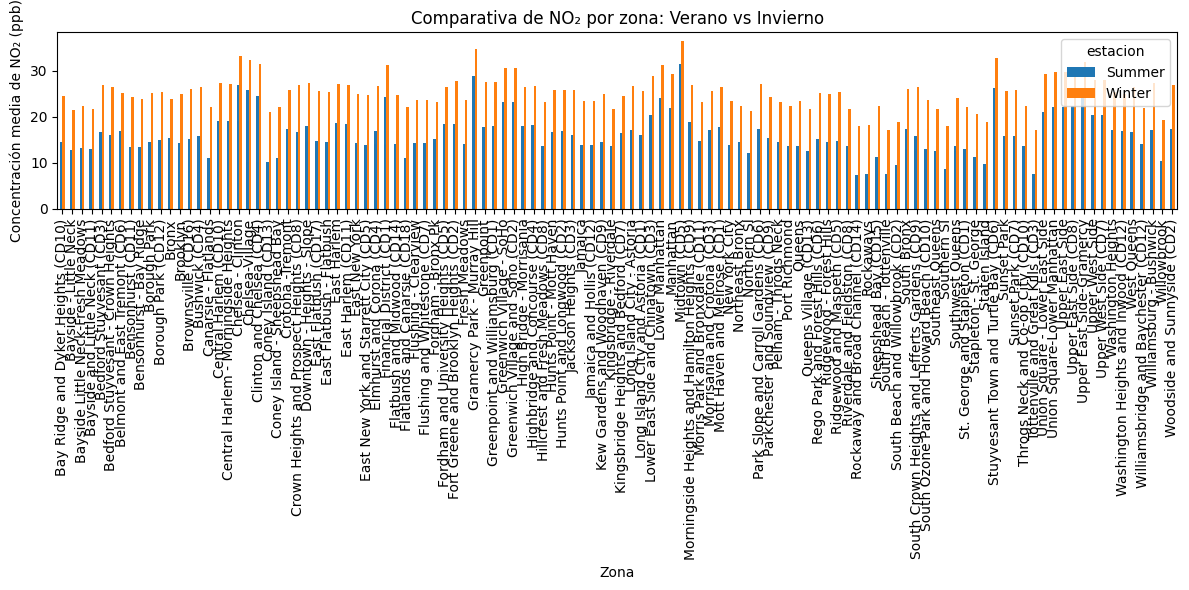

In [17]:
promedios.plot(kind='bar', figsize=(12,6))
plt.title('Comparativa de NO₂ por zona: Verano vs Invierno')
plt.ylabel('Concentración media de NO₂ (ppb)')
plt.xlabel('Zona')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [18]:
query_anual = """
SELECT 
    [Start_Date], 
    [Data Value] AS valor_no2
FROM air_data
WHERE Name = 'Nitrogen dioxide (NO2)' 
AND [Time Period] LIKE 'Annual%'
"""
df_anual = pd.read_sql(query_anual, conn)

# Convertir a fecha y extraer año
df_anual['Start_Date'] = pd.to_datetime(df_anual['Start_Date'])
df_anual['year'] = df_anual['Start_Date'].dt.year

df_anual.head()


,Start_Date,valor_no2,year
0,2017-01-01,12.550000,2017
1,2018-01-01,17.280000,2018
2,2015-12-31,18.200000,2015
3,2021-01-01,11.337294,2021
4,2012-12-01,12.540000,2012


In [19]:
promedios_anuales = df_anual.groupby('year')['valor_no2'].mean().reset_index()
promedios_anuales


,year,valor_no2
0,2008,25.748936
1,2009,23.760284
2,2010,24.169078
3,2011,22.051418
4,2012,21.310709
5,2013,21.010567
6,2015,19.913780
7,2017,19.684823
8,2018,18.822766
9,2019,17.320638


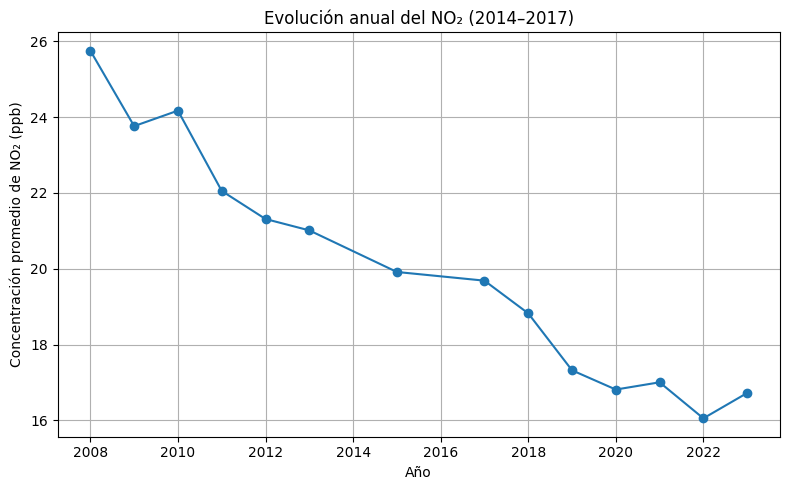

In [20]:
plt.figure(figsize=(8,5))
plt.plot(promedios_anuales['year'], promedios_anuales['valor_no2'], marker='o')
plt.title('Evolución anual del NO₂ (2014–2017)')
plt.xlabel('Año')
plt.ylabel('Concentración promedio de NO₂ (ppb)')
plt.grid(True)
plt.tight_layout()
plt.show()


Tendencia general: Descenso progresivo desde casi 26 ppb en 2008 a cerca de 16 ppb en 2022.

Posibles razones: Aunque no están en el dataset, esta caída puede estar relacionada con:

Mejores regulaciones ambientales.

Reducción del tráfico o cambios en combustibles.

Políticas públicas más estrictas sobre emisiones.



C:\Users\Rodrigo Lugo\Downloads\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


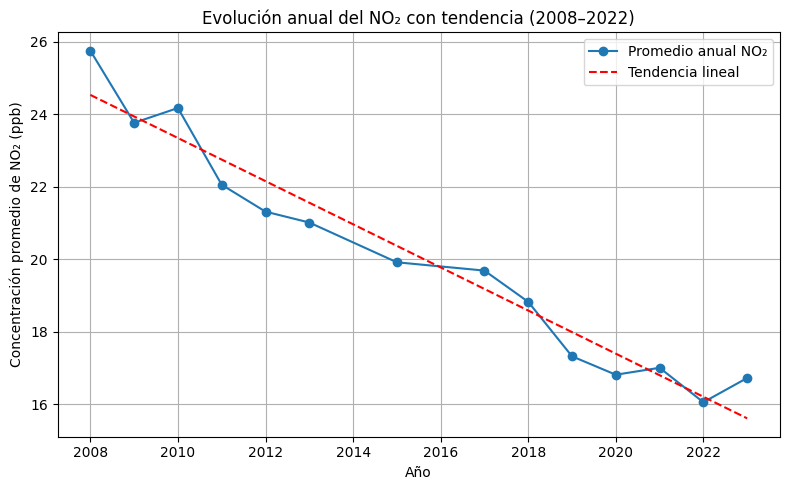

In [21]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Preparar datos
X = promedios_anuales[['year']]
y = promedios_anuales['valor_no2']
modelo = LinearRegression()
modelo.fit(X, y)

# Predicciones
X_pred = np.linspace(X.min(), X.max(), 100)
y_pred = modelo.predict(X_pred)

# Gráfico con línea de tendencia
plt.figure(figsize=(8,5))
plt.plot(promedios_anuales['year'], y, marker='o', label='Promedio anual NO₂')
plt.plot(X_pred, y_pred, color='red', linestyle='--', label='Tendencia lineal')
plt.title('Evolución anual del NO₂ con tendencia (2008–2022)')
plt.xlabel('Año')
plt.ylabel('Concentración promedio de NO₂ (ppb)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
pd.read_sql("SELECT DISTINCT Name FROM air_data;", conn)


,Name
0,Nitrogen dioxide (NO2)
1,Fine particles (PM 2.5)
2,Boiler Emissions- Total SO2 Emissions
3,Ozone (O3)
4,Asthma emergency department visits due to PM2.5
5,Annual vehicle miles traveled
6,Respiratory hospitalizations due to PM2.5 (age...
7,Asthma hospitalizations due to Ozone
8,Boiler Emissions- Total NOx Emissions
9,Boiler Emissions- Total PM2.5 Emissions


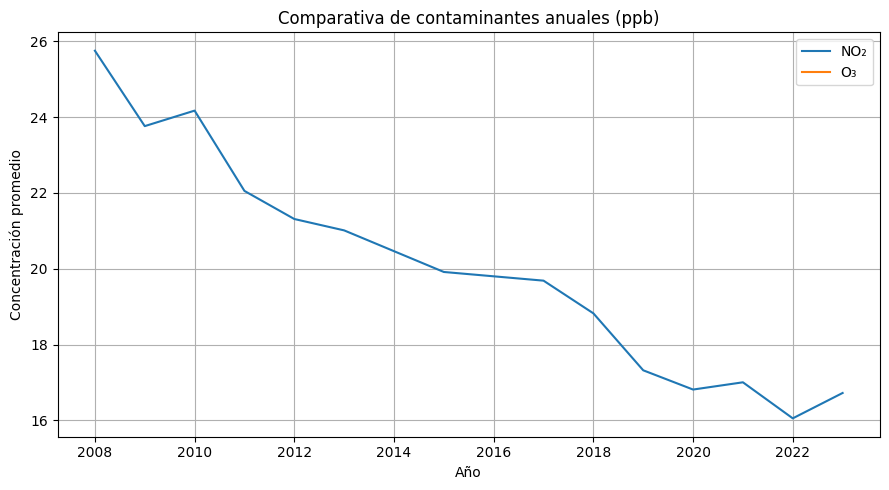

In [23]:
df_ozono = pd.read_sql("""
SELECT [Start_Date], [Data Value] AS valor_o3
FROM air_data
WHERE Name = 'Ozone (O3)' AND [Time Period] LIKE 'Annual%'
""", conn)

df_ozono['Start_Date'] = pd.to_datetime(df_ozono['Start_Date'])
df_ozono['year'] = df_ozono['Start_Date'].dt.year

ozono_agg = df_ozono.groupby('year')['valor_o3'].mean().reset_index()

# Gráfico comparativo
plt.figure(figsize=(9,5))
plt.plot(promedios_anuales['year'], promedios_anuales['valor_no2'], label='NO₂')
plt.plot(ozono_agg['year'], ozono_agg['valor_o3'], label='O₃')
plt.title('Comparativa de contaminantes anuales (ppb)')
plt.xlabel('Año')
plt.ylabel('Concentración promedio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


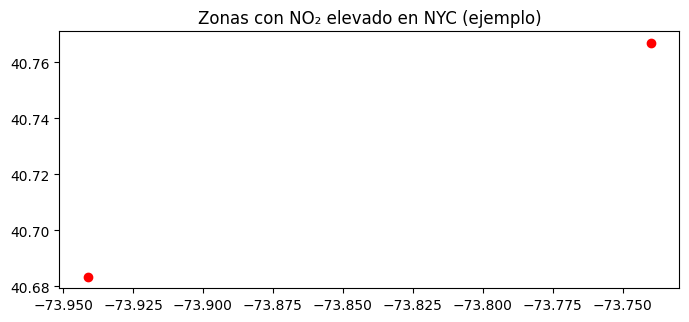

In [26]:
# Solo si no tienes lat/lon, y quieres geocodificar
from geopy.geocoders import Nominatim
import geopandas as gpd

geolocator = Nominatim(user_agent="geoapi")

# Obtener coordenadas de 5 zonas ejemplo
zonas = promedios.head(5).reset_index()
zonas['coords'] = zonas['zona'].apply(lambda x: geolocator.geocode(f"{x}, NYC"))
zonas['lat'] = zonas['coords'].apply(lambda x: x.latitude if x else None)
zonas['lon'] = zonas['coords'].apply(lambda x: x.longitude if x else None)

# Convertir a GeoDataFrame
gdf = gpd.GeoDataFrame(zonas, geometry=gpd.points_from_xy(zonas.lon, zonas.lat))

# Plot en mapa base
gdf.plot(marker='o', color='red', figsize=(8,6))
plt.title('Zonas con NO₂ elevado en NYC (ejemplo)')
plt.show()


In [27]:
zonas[['zona', 'lat', 'lon']]


estacion,zona,lat,lon
0,Bay Ridge and Dyker Heights (CD10),NaN,NaN
1,Bayside - Little Neck,40.766883,-73.739820
2,Bayside Little Neck-Fresh Meadows,NaN,NaN
3,Bayside and Little Neck (CD11),NaN,NaN
4,Bedford Stuyvesant (CD3),40.683436,-73.941249


In [28]:
zonas['zona_limpia'] = zonas['zona'].str.replace(r'\s*\(.*\)', '', regex=True)
zonas['coords'] = zonas['zona_limpia'].apply(lambda x: geolocator.geocode(f"{x}, New York", timeout=10))
zonas['lat'] = zonas['coords'].apply(lambda x: x.latitude if x else None)
zonas['lon'] = zonas['coords'].apply(lambda x: x.longitude if x else None)


In [ ]:
import contextily as ctx

# Convertir CRS (sistema de coordenadas)
gdf = gdf.set_crs(epsg=4326).to_crs(epsg=3857)

# Graficar con mapa base
ax = gdf.plot(figsize=(10,6), color='red', markersize=100)
ctx.add_basemap(ax)
plt.title('Zonas con NO₂ más alto en NYC (mapa base)')
plt.show()


In [ ]:
# Copia original por si acaso
zonas_original = promedios.head(10).reset_index()

# Limpiar zona: quitar lo entre paréntesis
zonas = zonas_original.copy()
zonas['zona_limpia'] = zonas['zona'].str.replace(r'\s*\(.*\)', '', regex=True)


In [32]:
from geopy.geocoders import Nominatim
import time

geolocator = Nominatim(user_agent="geoapi")

# Geocodificar con pausa para no ser bloqueado por la API
def geocode_safe(zona):
    try:
        return geolocator.geocode(f"{zona}, New York", timeout=10)
    except:
        return None

zonas['coords'] = zonas['zona_limpia'].apply(lambda x: geocode_safe(x))
zonas['lat'] = zonas['coords'].apply(lambda x: x.latitude if x else None)
zonas['lon'] = zonas['coords'].apply(lambda x: x.longitude if x else None)

# Verifica cuántas se ubicaron
zonas[['zona', 'lat', 'lon']]



estacion,zona,lat,lon
0,Bay Ridge and Dyker Heights (CD10),NaN,NaN
1,Bayside - Little Neck,40.766883,-73.739820
2,Bayside Little Neck-Fresh Meadows,NaN,NaN
3,Bayside and Little Neck (CD11),NaN,NaN
4,Bedford Stuyvesant (CD3),40.683436,-73.941249


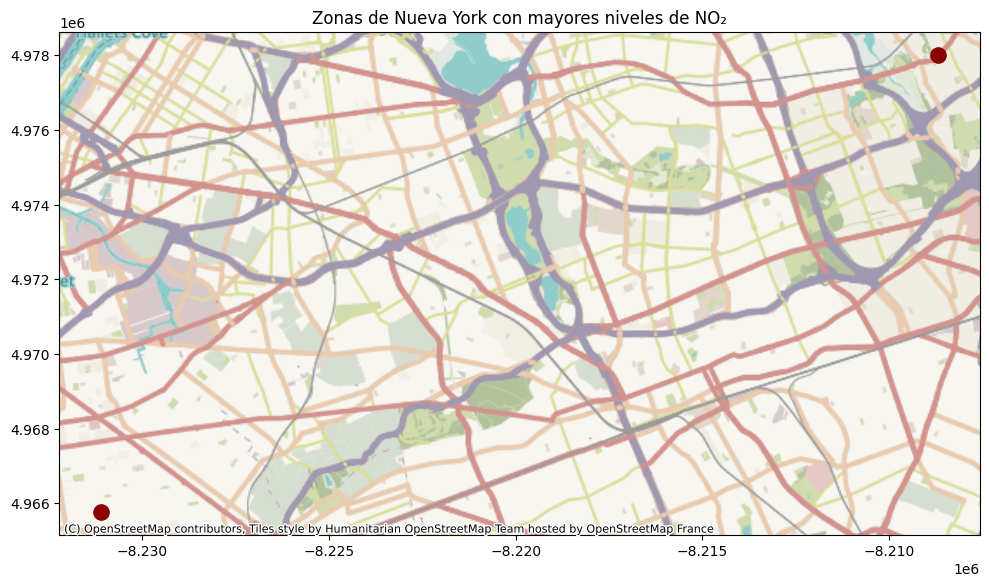

In [33]:
import contextily as ctx

# Convertimos a CRS web mercator para usar mapa base
gdf_web = gdf.to_crs(epsg=3857)

ax = gdf_web.plot(figsize=(10,6), color='darkred', markersize=120)
ctx.add_basemap(ax)
plt.title('Zonas de Nueva York con mayores niveles de NO₂')
plt.tight_layout()
plt.show()
